In [176]:
import numpy as np
import pandas as pd
import datetime 
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import plotly.express as px
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust the configuration of the plot created


birth = pd.read_csv('US_births_1994-2003_CDC_NCHS_MOD_Date.csv')
moon = pd.read_csv('moonphases.csv')
moon.head()

,phase,peak_datetime
0,Full Moon,1700-01-05T10:30:00
1,Last Quarter,1700-01-12T03:34:00
2,New Moon,1700-01-20T04:20:00
3,First Quarter,1700-01-28T05:13:00
4,Full Moon,1700-02-03T21:05:00


In [179]:
moon.dtypes

phase            object
peak_datetime    object
dtype: object

In [180]:
# Creating a new column with only the date while changing the type to datetime.
moon['date'] = moon['peak_datetime'].str.split('T').str[0]
moon["date"]= pd.to_datetime(moon["date"])
moon.head()

,phase,peak_datetime,date
0,Full Moon,1700-01-05T10:30:00,1700-01-05
1,Last Quarter,1700-01-12T03:34:00,1700-01-12
2,New Moon,1700-01-20T04:20:00,1700-01-20
3,First Quarter,1700-01-28T05:13:00,1700-01-28
4,Full Moon,1700-02-03T21:05:00,1700-02-03


In [177]:
birth.head()

,date,births
0,1/1/1994,8096
1,1/2/1994,7772
2,1/3/1994,10142
3,1/4/1994,11248
4,1/5/1994,11053


In [178]:
birth.dtypes

date      object
births     int64
dtype: object

In [188]:
## Converting the date from object to datetime.
birth['date'] = pd.to_datetime(birth['date'])

In [189]:
birth.head()

,date,births
0,1994-01-01,8096
1,1994-01-02,7772
2,1994-01-03,10142
3,1994-01-04,11248
4,1994-01-05,11053


In [192]:
## Merging the Moon Phase and Birth data on the shared dates.
mergedf = pd.merge(birth, moon, on=['date'], how='inner')
mergedf.head(100)

,date,births,phase,peak_datetime
0,1994-01-05,11053,Last Quarter,1994-01-05T00:01:00
1,1994-01-11,11706,New Moon,1994-01-11T23:10:00
2,1994-01-19,11257,First Quarter,1994-01-19T20:27:00
3,1994-01-27,11702,Full Moon,1994-01-27T13:23:00
4,1994-02-03,11523,Last Quarter,1994-02-03T08:06:00
...,...,...,...,...
95,1995-12-07,11242,Full Moon,1995-12-07T01:27:00
96,1995-12-15,11458,Last Quarter,1995-12-15T05:31:00
97,1995-12-22,11204,New Moon,1995-12-22T02:22:00
98,1995-12-28,12530,First Quarter,1995-12-28T19:06:00


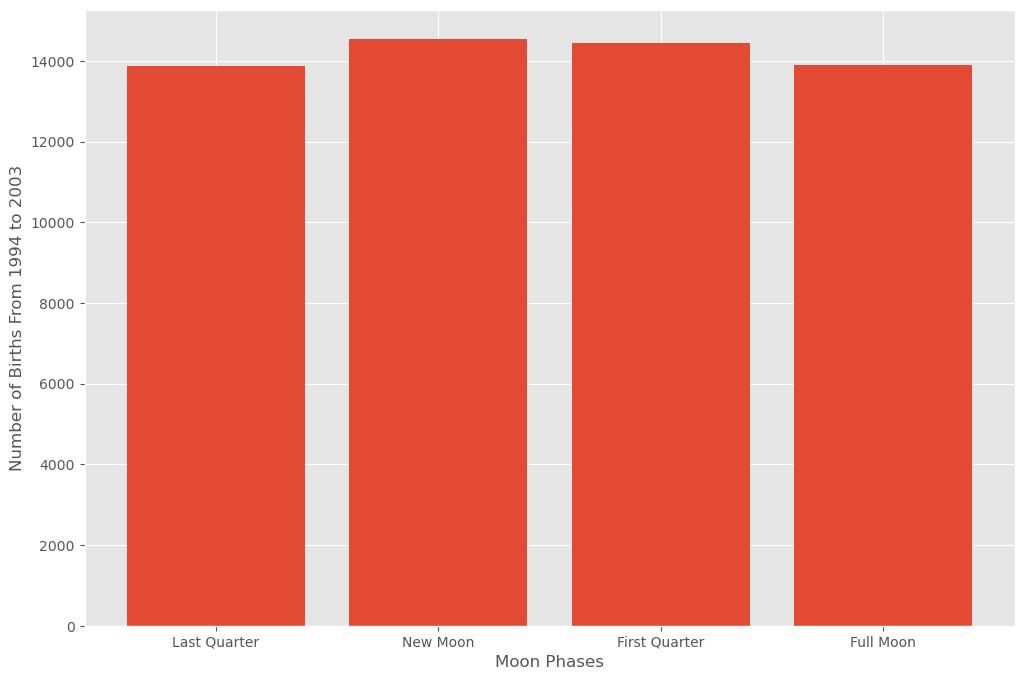

In [193]:
## Exploring the merged data set with a bar chart.
plt.bar(mergedf['phase'], mergedf['births'])
plt.xlabel("Moon Phases")
plt.ylabel("Number of Births From 1994 to 2003")
plt.show()
# Based birth data from 1994 to 2003 there appears to be no correlation between moon phases and births.

In [133]:
## Convering the dataframe to csv.
mergedf.to_csv('birth_moon.csv', header=True, index=False, encoding='utf-8')

In [134]:
## Calculating the total births in the data.
## Counting the number of times each phase occurs
total = mergedf['births'].sum()
mergedf['phase'].value_counts()

Last Quarter     124
New Moon         124
First Quarter    124
Full Moon        123
Name: phase, dtype: int64

In [135]:
## Sum of births for each phase.
full = mergedf.loc[mergedf['phase'] == 'Full Moon', 'births'].sum()
new = mergedf.loc[mergedf['phase'] == 'New Moon', 'births'].sum()
last = mergedf.loc[mergedf['phase'] == 'Last Quarter', 'births'].sum()
first = mergedf.loc[mergedf['phase'] == 'First Quarter', 'births'].sum()

In [158]:
## Converted into a percentage.
fullp = round(mergedf.loc[mergedf['phase'] == 'Full Moon', 'births'].sum()/total*100,2)
newp = round(mergedf.loc[mergedf['phase'] == 'New Moon', 'births'].sum()/total*100,2)
lastp = round(mergedf.loc[mergedf['phase'] == 'Last Quarter', 'births'].sum()/total*100,2)
firstp = round(mergedf.loc[mergedf['phase'] == 'First Quarter', 'births'].sum()/total*100,2)

In [162]:
## Dataframe for summarize moon phase plus births data
data  = pd.DataFrame({'Phases':['Last Quarter', 'New Moon', 'First Quarter', 'Full Moon'], 
        'Births':[last, new, first, full], 'Percentage of Total':[lastp, newp, firstp, fullp]})


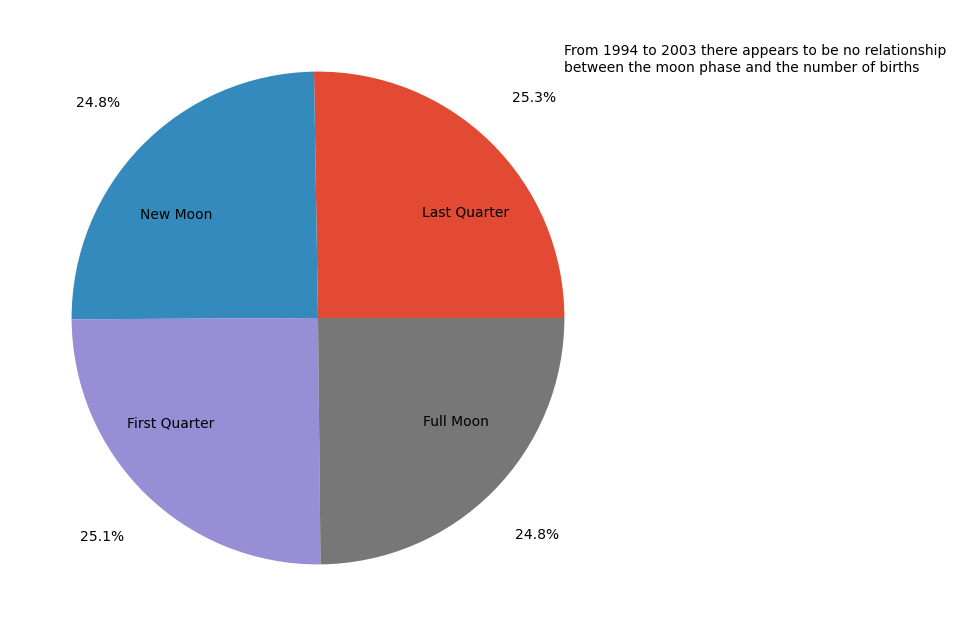

In [194]:
## Pie chart to see if the phase of the moon has effect.
fig, ax = plt.subplots()
ax.pie(data['Percentage of Total'], labels=data['Phases'], autopct='%1.1f%%',
       pctdistance=1.25, labeldistance=.6)
plt.text(1,1,
         'From 1994 to 2003 there appears to be no relationship\nbetween the moon phase and the number of births')
plt.show()

In [195]:
## Convert dataframe to csv file
data.to_csv('births_moonPhase.csv', header=True, index=False, encoding='utf-8')

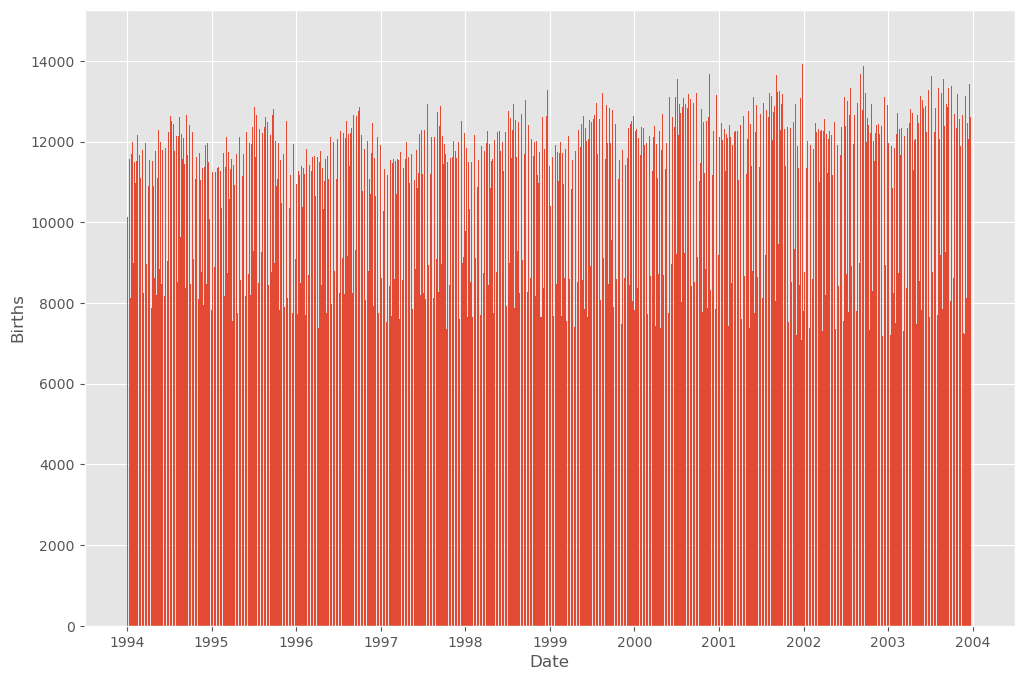

In [208]:
## Now I want to explore the birth data.
plt.bar(birth['date'], birth['births'])
plt.xlabel("Date")
plt.ylabel("Births")
plt.show()

In [ ]:
## There seems to be a cyclical pattern to the number of births thoughtout the year. 
## There are some part of the year where the number of births decrease.

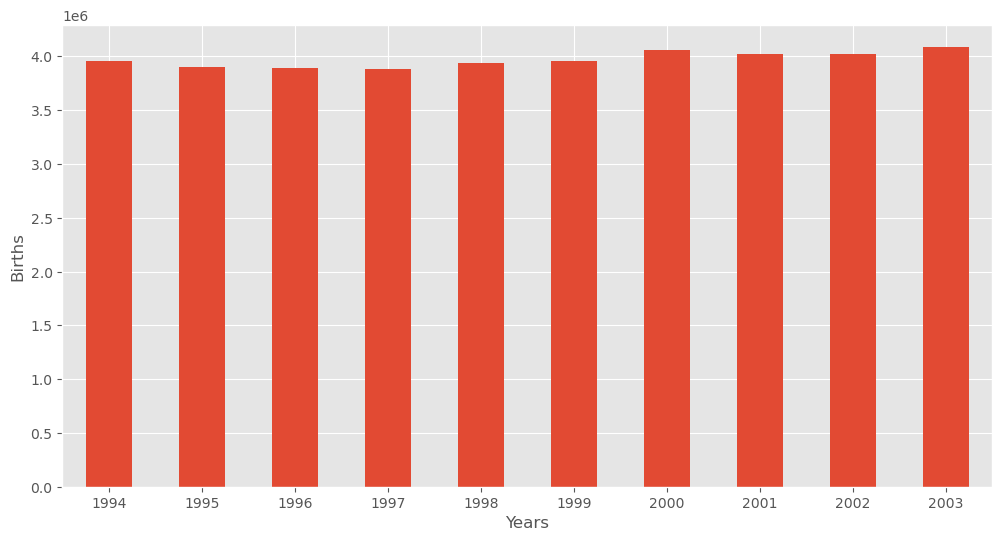

In [216]:
## I want to see if the number of births per year are increasing in this data set.
fig, axs = plt.subplots(figsize=(12,6))
birth.groupby(birth['date'].dt.year)['births'].sum().plot(kind = 'bar', rot=0, ax=axs)
plt.xlabel('Years')
plt.ylabel('Births')
plt.show()

In [ ]:
## It looks like the number of births each year are increasing.

In [ ]:
## It looks like the number of births each year are increasing.

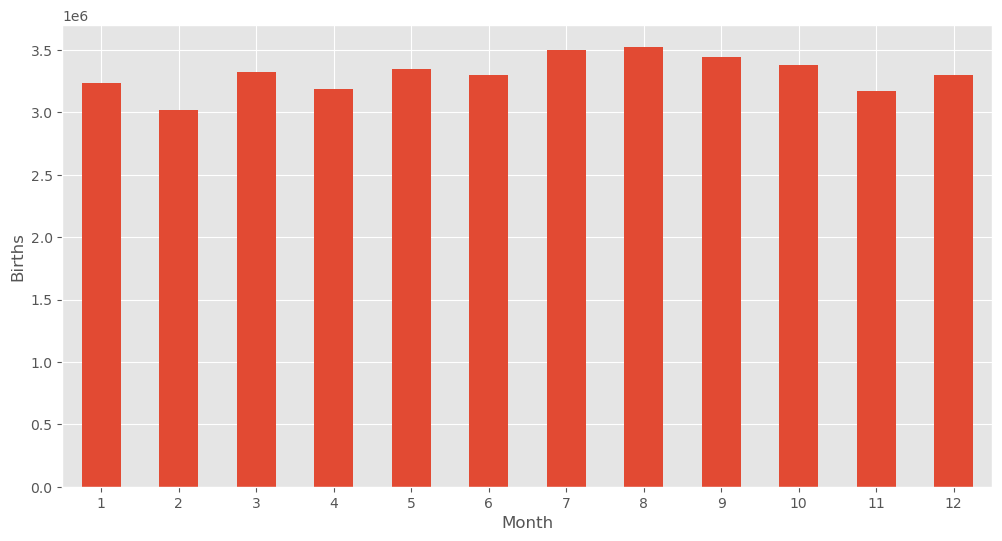

In [214]:
## I want to see which months over this period of time have the most number of births
fig, axs = plt.subplots(figsize=(12,6))
birth.groupby(birth['date'].dt.month)['births'].sum().plot(kind = 'bar', rot=0, ax=axs)
plt.xlabel('Month')
plt.ylabel('Births')
plt.show()

In [ ]:
## It appears that more births occurred in July and August.
## February had the least amount of births. 